In [1]:
import pandas as pd
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
mainpath = "/Users/soldash/Documents/Tesis/python/Datos/Todas/" #ruta de Carga de los datos
filename = "dataframe_concatenado.csv" #Nombre del archivo a cargar

In [3]:
data = pd.read_csv(mainpath+filename, sep=",")
dummy_df = pd.get_dummies(data, columns=['Seizure'])
dummy_df

,ECG,Time,RRI,SDNN,HR,HR_std,NN50,pNN50,HF,LF,Total_power,LF_HF,Seizure_0,Seizure_1,Seizure_2
0,-103.76,2022-07-01 13:25:10.520,664,159.342208,90,1.472363,15,46.875000,1405.554118,1806.423996,7091.854690,1.285204,0,0,1
1,13.07,2022-07-01 13:25:17.080,712,164.505513,90,1.209623,17,50.000000,2767.162779,4630.892866,23767.740430,1.673517,0,0,1
2,-56.95,2022-07-01 13:25:19.080,532,189.341631,91,1.145864,20,54.054054,2944.626153,4952.310225,26649.719756,1.681813,0,0,1
3,83.24,2022-07-01 13:25:16.380,784,164.551134,91,1.242441,17,50.000000,2579.758213,4204.472971,21965.273563,1.629793,0,0,1
4,162.54,2022-07-01 13:25:06.880,682,124.109148,88,1.400575,13,41.935484,572.531005,1497.050280,4298.146616,2.614793,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221795,-20.52,2022-07-02 02:13:48.750,970,451.274655,53,1.346061,12,54.545455,35491.245417,69588.665643,208801.680408,1.960728,1,0,0
221796,22.61,2022-07-02 02:14:16.100,990,251.018848,54,0.627083,11,47.826087,28219.195897,85672.850272,285006.461062,3.035978,1,0,0
221797,-226.50,2022-07-02 02:16:04.100,1525,236.765646,57,0.502655,12,52.173913,9265.808753,12742.977193,74454.898631,1.375269,1,0,0
221798,-35.91,2022-07-02 02:13:52.450,1425,212.634752,54,1.025225,12,54.545455,38532.339011,73043.033828,223054.480452,1.895629,1,0,0


Tamaño de muestras preictales :73879


(array([73879.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 73879.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

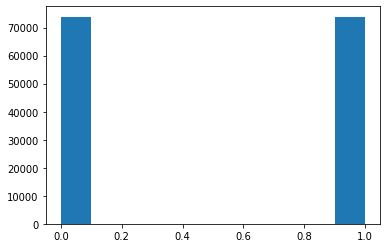

In [4]:
#Igualar muestras
sample_size = dummy_df[dummy_df["Seizure_1"] == 1].shape[0]
print("Tamaño de muestras preictales :"+ str(sample_size))

preictal = dummy_df[dummy_df["Seizure_1"] == 1]
other = dummy_df[dummy_df["Seizure_1"] == 0]

preictal_data = preictal.sample(n= sample_size)
other_data = other.sample(n= sample_size)
    
Sample = pd.concat([preictal_data, other_data], axis = 0)

plt.hist(Sample["Seizure_1"])

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Definiendo los datos
X = Sample[['RRI', 'SDNN', 'HR', 'HR_std', 'NN50', 'pNN50', 'HF', 'LF', 'Total_power', 'LF_HF']]
y = Sample['Seizure_1']

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalando los datos (importante para SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Lista de kernels a probar
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

best_accuracy = 0
best_kernel = ""
best_svm = None  # Esta variable almacenará el mejor modelo SVM

for kernel in kernels:
    print(f"Entrenando con kernel: {kernel}")
    svm = SVC(kernel=kernel, gamma='scale')  # gamma='scale' es recomendado para RBF, Poly y Sigmoid
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Precisión con {kernel}: {accuracy}\n")
    
    # Añadir el reporte de clasificación
    report = classification_report(y_test, y_pred)
    print(report)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_kernel = kernel
        best_svm = svm  # Se guarda el mejor modelo SVM en esta variable
        best_y_pred = y_pred
        best_y_test = y_test

print(f"El mejor kernel es: {best_kernel} con una precisión de: {best_accuracy}")


Entrenando con kernel: linear
Precisión con linear: 0.5903153762858689

              precision    recall  f1-score   support

           0       0.57      0.71      0.63     14801
           1       0.62      0.47      0.53     14751

    accuracy                           0.59     29552
   macro avg       0.60      0.59      0.58     29552
weighted avg       0.60      0.59      0.58     29552

Entrenando con kernel: poly
Precisión con poly: 0.8005549539794261

              precision    recall  f1-score   support

           0       0.80      0.81      0.80     14801
           1       0.80      0.80      0.80     14751

    accuracy                           0.80     29552
   macro avg       0.80      0.80      0.80     29552
weighted avg       0.80      0.80      0.80     29552

Entrenando con kernel: rbf
Precisión con rbf: 0.8676570113697889

              precision    recall  f1-score   support

           0       0.89      0.84      0.86     14801
           1       0.85      0.

In [2]:
# Predice las etiquetas para el conjunto de entrenamiento
y_train_pred = best_svm.predict(X_train)

# Calcula y muestra el accuracy de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy de Entrenamiento: {train_accuracy}")


NameError: name 'best_svm' is not defined

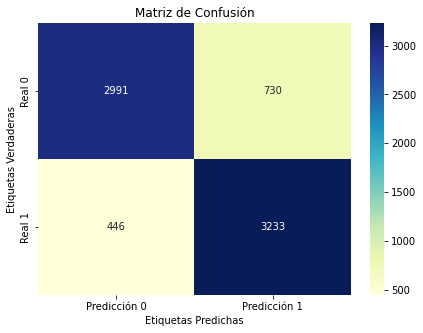

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Crear la matriz de confusión
cm = confusion_matrix(best_y_test, best_y_pred)

# Convertir la matriz de confusión a DataFrame para etiquetar fácilmente los ejes
cm_df = pd.DataFrame(cm, index=['Real 0', 'Real 1'], columns=['Predicción 0', 'Predicción 1'])

plt.figure(figsize=(7,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt="g")  # fmt="g" para evitar notación científica
plt.title('Matriz de Confusión')
plt.ylabel('Etiquetas Verdaderas')
plt.xlabel('Etiquetas Predichas')
plt.show()